In [2]:
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')
from math import ceil
#Plots
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from pandas.tools.plotting import parallel_coordinates
#Advanced optimization
from scipy import optimize as op

In [8]:
path = 'C:/Users/parth/Desktop/Udemy/ML/Algo Implementation From Scratch/'
iris = pd.read_csv(path+'IRIS.csv')
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


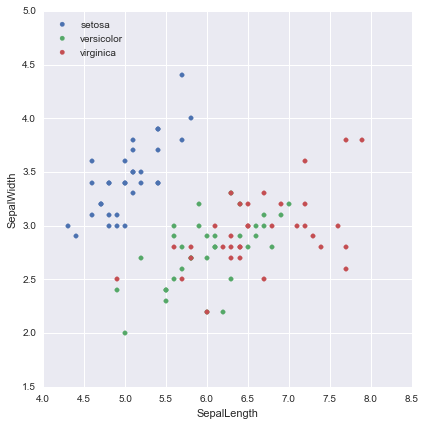

In [12]:
%matplotlib inline
sepalPit = sb.FacetGrid(iris,hue='Species',size=6).map(plt.scatter,"SepalLength","SepalWidth")
plt.legend(loc="upper left")
plt.show()

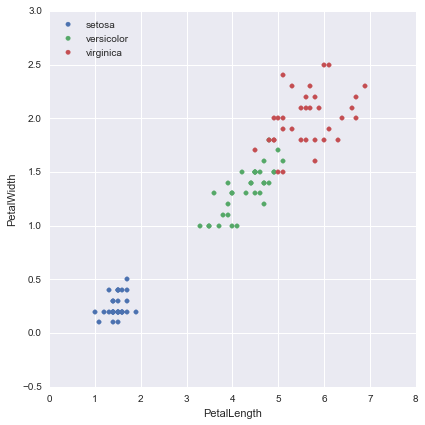

In [17]:
petalPlot = sb.FacetGrid(iris,hue="Species",size=6).map(plt.scatter,"PetalLength","PetalWidth")
plt.legend(loc="upper left")
plt.show()

In [42]:
Species = ['setosa','versicolor','virginica']
m = iris.shape[0]
n = 4
X = np.ones((m,n+1)).astype(float)
y = np.array((m,1))

X[:,1] = iris['PetalLength'].values
X[:,2] = iris['PetalWidth'].values
X[:,3] = iris['SepalLength'].values
X[:,4] = iris['SepalWidth'].values

y = iris['Species'].values

#Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=25)

In [48]:
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

In [65]:
def regCostFunction(theta,X,Y,_lambda=0.1):
    m = len(Y)
    #print("X shape in regCost",X.shape)
    h = sigmoid(X.dot(theta)) 
    # X is mx5 and theta is 5x1. Also Y is mx1. So we have to multiply Y transpose to X x theta 
    
    tmp = np.copy(theta)
    tmp[0] = 0
    reg = (_lambda/(2*m)) * np.sum(tmp**2)
        
    return (-1/m) * ((Y.T.dot(np.log(h))) + (1-Y).T.dot(np.log(1-h))) + reg

In [66]:
def gradient(theta,X,Y,_lambda=0.1):
    #m = len(Y)
    m, n = X.shape
    theta = theta.reshape((n, 1))
    Y = Y.reshape((m, 1))
    z = X.dot(theta)
    
    tmp = np.copy(theta)
    tmp[0] = 0
    reg = (_lambda/m)*tmp
    
    grad = ((1/m) * X.T.dot((sigmoid(z) - Y))) + reg
    
    return grad

In [162]:

def logisticRegression(X,Y,theta,alpha=0.001):
    for i in range(10000):
        theta = theta - alpha * gradient(theta,X,Y)
    theta = [item for sublist in theta for item in sublist]
    return theta


In [135]:
'''
def logisticRegression(X,Y,theta):
    result = op.minimize(fun = regCostFunction,x0 = theta,args = (X,Y),method='TNC',jac = gradient)
    #print(result)
    return result.x
'''

In [102]:
# Training

theta_mat = np.zeros((3,n+1))

for i,flower in enumerate(Species):
    temp_y = np.array(y_train == flower,dtype = int)
    optTheta = logisticRegression(X_train,temp_y,np.zeros((n+1,1)),0.0001)
    #print(optTheta.shape)
    theta_mat[i] = optTheta


In [103]:
theta_mat

array([[ 0.        , -0.31699418, -0.29246987, -0.2525802 ,  0.22330463],
       [ 0.        ,  0.07207857,  0.0513161 ,  0.00204243, -0.22200534],
       [ 0.        ,  0.25299842,  0.26395781,  0.21475795, -0.03563175]])

In [104]:
P = sigmoid(X_test.dot(theta_mat.T))
P

array([[ 0.48875747,  0.54644929,  0.48035154],
       [ 0.77592405,  0.43904481,  0.26895647],
       [ 0.42756024,  0.49165784,  0.57543726],
       [ 0.36006632,  0.56236763,  0.59026017],
       [ 0.25191116,  0.59778138,  0.67449845],
       [ 0.79739716,  0.41386394,  0.26224668],
       [ 0.40228481,  0.51441365,  0.57955481],
       [ 0.33022773,  0.56395163,  0.61853228],
       [ 0.37110887,  0.55443426,  0.59144197],
       [ 0.27521171,  0.56531417,  0.67751938],
       [ 0.7879143 ,  0.40023102,  0.27847313],
       [ 0.46407083,  0.54337512,  0.50035243],
       [ 0.32082867,  0.51360347,  0.66877661],
       [ 0.42958793,  0.58230682,  0.51356041],
       [ 0.29462599,  0.51141201,  0.69849976],
       [ 0.2860045 ,  0.51253744,  0.69551971],
       [ 0.28854467,  0.53239166,  0.67758667],
       [ 0.47659059,  0.57531638,  0.46272052],
       [ 0.34277896,  0.5257291 ,  0.6314269 ],
       [ 0.50788804,  0.51666018,  0.48189945],
       [ 0.31429197,  0.56337415,  0.643

In [107]:
y_pred = [Species[np.argmax(P[i,:])] for i in range(X_test.shape[0])]
print(y_pred)

['versicolor', 'setosa', 'virginica', 'virginica', 'virginica', 'setosa', 'virginica', 'virginica', 'virginica', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'virginica', 'setosa', 'virginica']


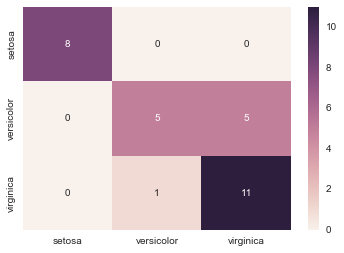

In [106]:
cfm = confusion_matrix(y_test,y_pred,labels = Species)
sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species)
plt.show()

# Experimentation

In [156]:
Species = ['setosa','versicolor'] #,'virginica']
iris2 = iris.ix[iris['Species'] != 'virginica']
m = iris2.shape[0]
n = 2
X = np.ones((m,n+1)).astype(float)
y = np.array((m,1))

X[:,1] = iris2['PetalLength'].values
X[:,2] = iris2['PetalWidth'].values

y = iris2['Species'].values

#Normalization
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)

X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=25)

In [157]:
X[:10,:]

array([[ 1. ,  1.4,  0.2],
       [ 1. ,  1.4,  0.2],
       [ 1. ,  1.3,  0.2],
       [ 1. ,  1.5,  0.2],
       [ 1. ,  1.4,  0.2],
       [ 1. ,  1.7,  0.4],
       [ 1. ,  1.4,  0.3],
       [ 1. ,  1.5,  0.2],
       [ 1. ,  1.4,  0.2],
       [ 1. ,  1.5,  0.1]])

In [163]:
theta_mat = np.zeros((2,n+1))

for i,flower in enumerate(Species):
    temp_y = np.array(y_train == flower,dtype = int)
    theta_init = np.random.random((n+1,1))
    print(theta_init)
    optTheta = logisticRegression(X_train,temp_y,theta_init)
    #print(optTheta.shape)
    theta_mat[i] = optTheta
    
theta_mat

[[ 0.09548769]
 [ 0.74389334]
 [ 0.27189067]]
[[ 0.56615318]
 [ 0.80027745]
 [ 0.9773081 ]]


array([[ 1.32130197, -0.54679947, -0.56456614],
       [-1.1793534 ,  0.30607858,  1.2618361 ]])

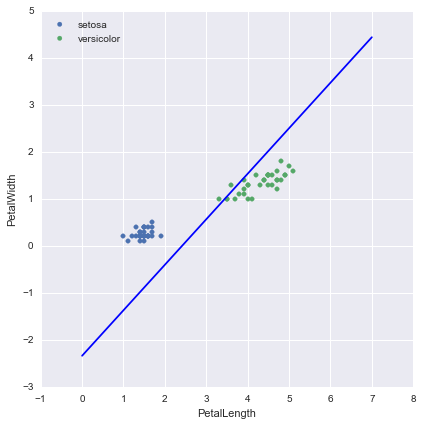

In [164]:
x = [0,1,2,3,4,5,6,7]
y = [0,.5,1.0,1.5,2,2.5,3,3.5]
slope = theta_mat[0,1] / theta_mat[0,2]
intercept = theta_mat[0,0] / theta_mat[0,2]
setosaLine = [slope * i + intercept for i in x]
#versiLine = [-theta_mat[1,1]*i/theta_mat[1,2] for i in x]

petalPlot = sb.FacetGrid(iris2,hue="Species",size=6)
petalPlot = petalPlot.map(plt.scatter,"PetalLength","PetalWidth")
#petalPlot = petalPlot.map_dataframe(plt.plot, [-20,120], [0,0], 'r-').add_legend().set_axis_labels("x", "y")
#plt.plot(np.linspace(2,5,1000), [0]*1000, 'r')
plt.plot(x, setosaLine, 'b')
#plt.plot(x,versiLine,'r')
plt.legend(loc="upper left")
plt.show()

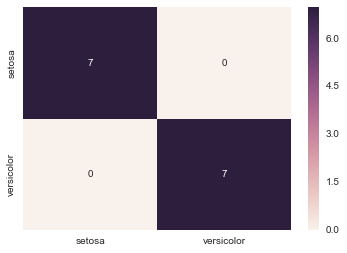

In [140]:
P = sigmoid(X_test.dot(theta_mat.T))
y_pred = [Species[np.argmax(P[i,:])] for i in range(X_test.shape[0])]
cfm = confusion_matrix(y_test,y_pred,labels = Species)
sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species)
plt.show()

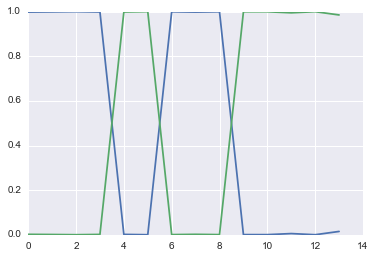

In [141]:
plt.plot(P)
plt.show()

In [149]:
np.random.random((3,2))

array([[ 0.48135403,  0.888588  ],
       [ 0.71014357,  0.25674617],
       [ 0.61427349,  0.41127555]])